In [1]:
# storia più su nns convolutive, capsulenetwork, evoluzione, problemi di classificazione





# usare affnist



# prova minst su affnist e verificare risultati con paper
# testare su dataset normale + rotraslato*2
# clustering per training
# risultato si su db normale sia rototraslato
#
# + provare no shearing


# matrice di confusione normalizzata sia su righe che su colonne (tot 3 matrici)

### Import statements

In [2]:
%%capture

import numpy as np
import tensorflow as tf
from datetime import datetime

# for affine transformation functions
import torchvision.transforms as transforms
import torchvision.transforms.functional as fn
import torch
import math

# for loading affNIST_original
import scipy.io as spio

#for training progress bar
from tqdm import tqdm

#for image display
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# for performances functions
from numpy import sqrt 
import seaborn as sns
import pandas as pd

#mandatory for correct load and save of files
%cd /Users/paolobonomi/Work/Python/CapsNetwork

# for project class
import sys
sys.path.append("/Users/paolobonomi/Work/Python/CapsNetwork/src")

from setup import Setup # set up model and dataset
import perfu # performance function such as confusion matrix etc...
import printer

### Retrieve model and dataset

In [3]:
setup = Setup()
model = setup.get_model()
X_train, y_train = setup.get_train_images()
X_test, y_test = setup.get_test_images()
dataset = setup.get_dataset()
training = setup.get_testing()

Found GPU at: /device:GPU:0
Load Custom affNIST train dataset _v1... 
Metal device set to: Apple M1
Load Custom affNIST test dataset _v1... 
Processing dataset... 


2022-10-20 19:23:26.039305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 19:23:26.039384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-20 19:23:26.152921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 19:23:26.152944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Creating model... 
Loading model... 


2022-10-20 19:23:26.782619: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-20 19:23:26.782686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-20 19:23:30.440214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### Perfomance data

In [4]:
should_create_matrix = False

In [5]:
if should_create_matrix:
    confusionmatrix_test = perfu.get_confusion_mat(model.predict, testing, "test")
    %store confusionmatrix_test
    
    confusionmatrix_train = perfu.get_confusion_mat(model.predict, dataset, "train")
    %store confusionmatrix_train
else:
    %store -r confusionmatrix_train
    %store -r confusionmatrix_test 
    
acc_train = perfu.get_accuracy(perfu.normalize_matrix( confusionmatrix_train, X_train.shape[0]))
acc_test = perfu.get_accuracy(perfu.normalize_matrix( confusionmatrix_test, X_test.shape[0]))

#### Testing Confusion Table

In [6]:
values, columns, index = perfu.get_confusion_table(confusionmatrix_test, X_test.shape[0])
printer.print_confusion_tables(values, columns, index)

Digit,0,1,2,3,4,5,6,7,8,9
Condition Positive,1038,1149,1017,1066,973,888,914,1058,900,997
Condition Negative,8962,8851,8983,8934,9027,9112,9086,8942,9100,9003
True Positive (TN),976,1123,982,997,941,840,901,998,883,942
False Negative (FN),62,26,35,69,32,48,13,60,17,55
False Positive (FP),4,12,50,13,41,52,57,30,91,67
True Negative (TN),8958,8839,8933,8921,8986,9060,9029,8912,9009,8936
Sensitivity (TPR),0.94,0.977,0.966,0.935,0.967,0.946,0.986,0.943,0.981,0.945
Specificity (TNR),1,0.999,0.994,0.999,0.995,0.994,0.994,0.997,0.99,0.993
Positive Predictive Value (PPV),0.996,0.989,0.952,0.987,0.958,0.942,0.941,0.971,0.907,0.934
Negative Predictive Value (NPV),0.993,0.997,0.996,0.992,0.996,0.995,0.999,0.993,0.998,0.994


#### Confusion Matrix

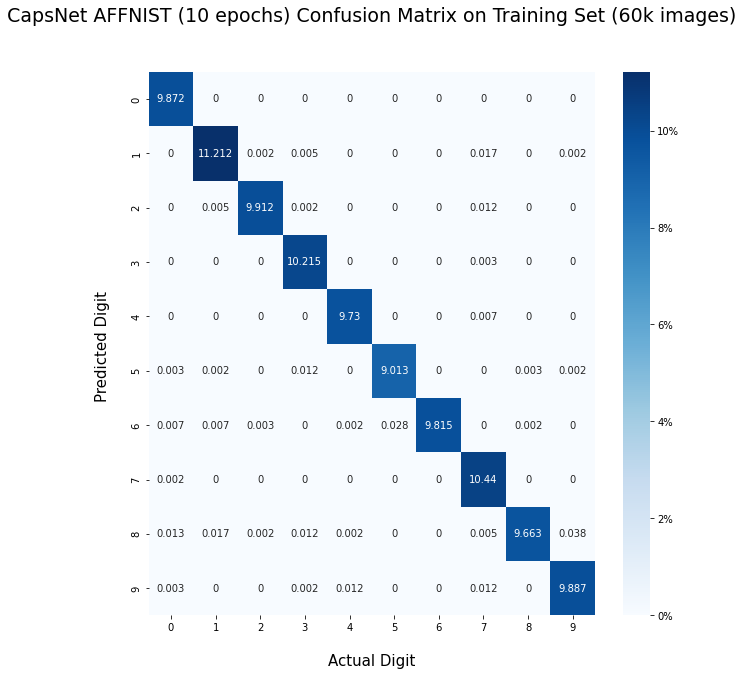

In [7]:
printer.print_matrix(
    np.around(perfu.normalize_matrix( confusionmatrix_train, X_train.shape[0]), decimals=3),
    'CapsNet AFFNIST (10 epochs) Confusion Matrix on Training Set ('+str(int(X_train.shape[0]/1000))+'k images)',
    'Actual Digit',
    'Predicted Digit',
    perfu.headers,
    perfu.headers)

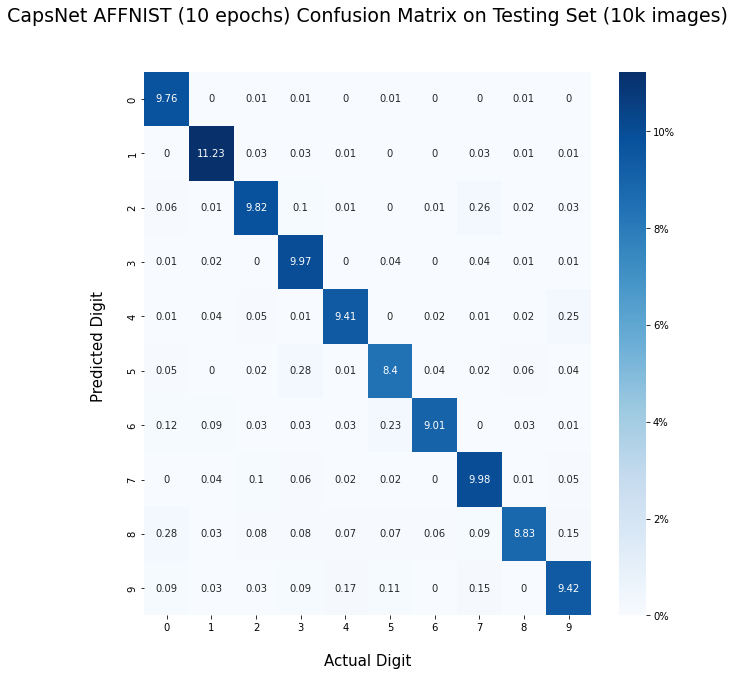

In [8]:
printer.print_matrix(
    np.around(perfu.normalize_matrix( confusionmatrix_test, X_test.shape[0]), decimals=3),
    'CapsNet AFFNIST (10 epochs) Confusion Matrix on Testing Set ('+str(int(X_test.shape[0]/1000))+'k images)',
    'Actual Digit',
    'Predicted Digit',
    perfu.headers,
    perfu.headers)

#### Accuracy

In [9]:
printer.print_accuracy(acc_train, acc_test, X_train.shape[0], X_test.shape[0])

,Accuracy,# Images,Epochs
Train,99.758,60000,10
Test,95.830,10000,10


In [10]:
off = 44
n = 110
idx, pred = perfu.get_error_index(model, X_test[off:off+n], y_test[off:off+n], off)

print(idx)
print(pred)

2022-10-20 19:23:38.442095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[45, 78, 98, 139, 151]
[8, 1, 5, 9, 3]


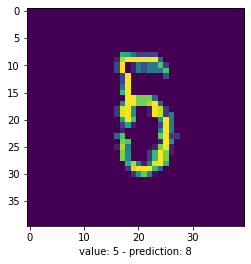

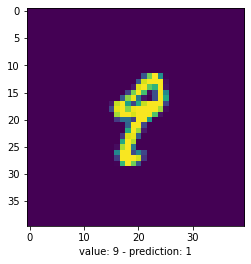

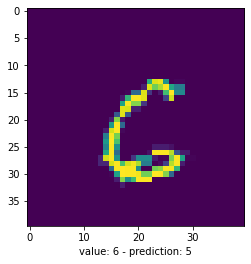

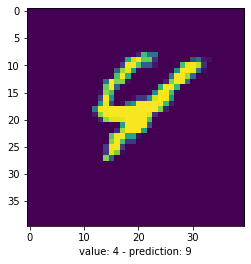

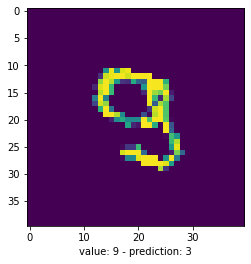

In [11]:
for i in range(len(idx)):
    img = idx[i]
    printer.print_image_and_prediction(X_test[img], y_test[img], pred[i], 40 )


In [16]:
def show_grid(x, dimx, dimy, title, size=20.):
    fig = plt.figure(figsize=(size, size))
    fig.suptitle(title, fontsize=16)
    grid = ImageGrid( fig, 111,nrows_ncols=(dimy, dimx),axes_pad=0.1, )
    a = []

    for i in range(dimx*dimy):
        j = x[:, :, i]
        a.append(j)

    for ax, im in zip(grid, a):
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.imshow(im, cmap="gray")

    fig.subplots_adjust(top=0.97) 
    plt.show()

def show_conv1_rfm(x, f, b):
    x = tf.nn.conv2d(x,f,strides=[1, 1],padding='VALID')
    x = tf.add(x, b)
    x = tf.nn.relu(x).numpy()
    show_grid(x[0], 16, 16, "Conv1 256 output 32x32x256")
    
def show_prim_caps_rfm(x, f, b):
    x = np.array(tf.reshape( x, [1, 32, 32, 256]))
    x = tf.nn.conv2d(x,f,strides=[2, 2],padding='VALID')
    x = tf.add(x, b)
    show_grid(x[0], 8, 32, "Primary Capsule 12x12x8 output, each row is a channel (32 total)", 40.)

def print_network(model, x, y, image_size):    
    #----------------------------------------------------- INPUT
    
    x = tf.reshape(x, [1, image_size, image_size, 1])
    printer.print_image_and_prediction(x, y, model.predict(x)[0], image_size)

    #-------------------------------------------------------- CONV1

    # filters
    f = model.layers[0].get_weights()[0]
    # biases
    b = model.layers[0].get_weights()[1]

    
    show_conv1_rfm(x, f, b) # show reconstructed feature maps

    #-------------------------------------------------------- OUTPUT

    x = model.convolution(x)

    #-------------------------------------------------------- PRIMARY CAPSULE

    f = model.layers[1].get_weights()[0]
    b = model.layers[1].get_weights()[1]
    
    show_prim_caps_rfm(x, f, b) # shows recostructed feature maps

    #-------------------------------------------------------- OUTPUT

    x = model.primary_capsule(x)

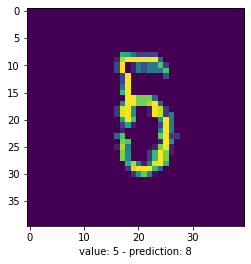

In [ ]:
printer.print_network(model, X_test[45], y_test[45], 40)